### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA  # For visualization
import seaborn as sns

### Load Dataset

In [2]:
iris = load_iris()
X = iris.data  # We only use features, not target labels
feature_names = iris.feature_names

### Standardize the data

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Determine optimal k using Elbow Method & Silhouette Score

In [4]:
wcss = []  # Within-cluster sum of squares
silhouette_scores = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

### Plot Elbow Curve

Text(0.5, 1.0, 'Elbow Curve')

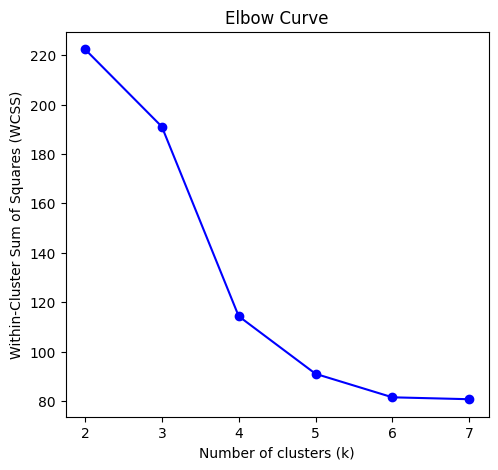

In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Curve')

### Plot Silhouette Scores

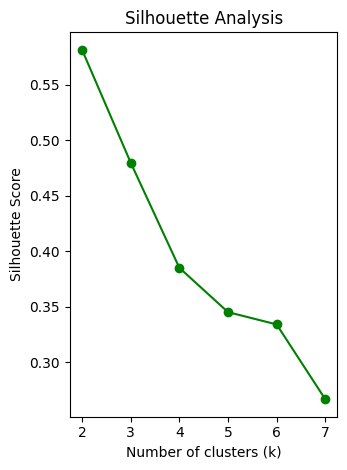

In [6]:
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

### K-Means Clustering

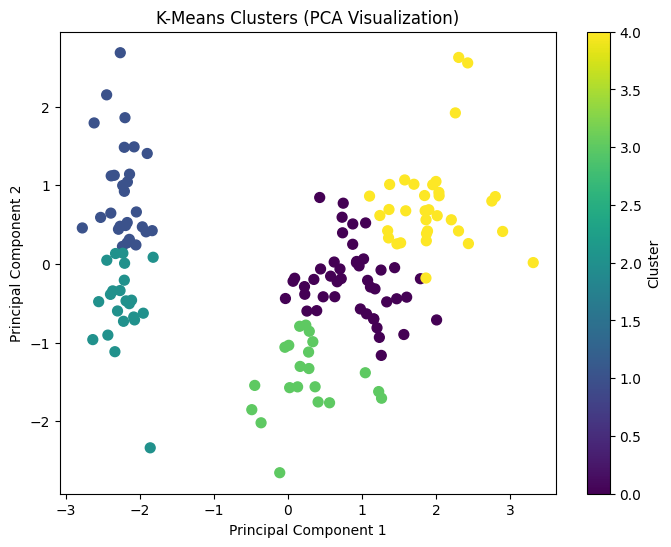

In [7]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters (PCA Visualization)')
plt.colorbar(scatter, label='Cluster')
plt.show()

### Cluster Analysis(mean feature values per cluster)

In [8]:
cluster_df = pd.DataFrame(X, columns=feature_names)
cluster_df['Cluster'] = clusters
print("\nCluster Characteristics (Mean Values):")
print(cluster_df.groupby('Cluster').mean())
print()


Cluster Characteristics (Mean Values):
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 6.097778          2.875556           4.726667   
1                 5.225000          3.678571           1.475000   
2                 4.727273          3.109091           1.445455   
3                 5.542857          2.442857           3.947619   
4                 6.923529          3.132353           5.735294   

         petal width (cm)  
Cluster                    
0                1.584444  
1                0.271429  
2                0.213636  
3                1.200000  
4                2.091176  



### Pairplot of clusters

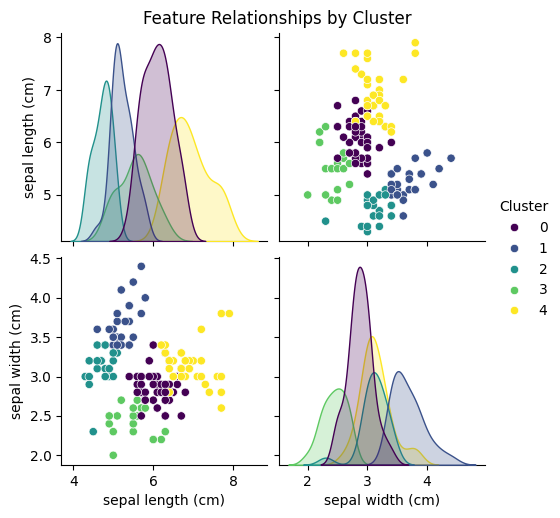

In [9]:
sns.pairplot(cluster_df, vars=feature_names[:2], hue='Cluster', palette='viridis')
plt.suptitle('Feature Relationships by Cluster', y=1.02)
plt.show()